___

<a href='https://github.com/ai-vithink'> <img src='https://avatars1.githubusercontent.com/u/41588940?s=200&v=4' /></a>
___

# Categorical Data Plots

Now let's discuss using seaborn to plot categorical data! There are a few main plot types for this:

* factorplot
* boxplot
* violinplot
* stripplot
* swarmplot
* barplot
* countplot

Let's go through examples of each!

In [9]:
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [1]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')
# To hide warnings, which won't change the desired outcome.

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
%matplotlib inline
sns.set_style('darkgrid')

In [6]:
tips = sns.load_dataset('tips')
tips.head()
# Here in categorical plots we are mainly trying to see the distribution of a categorical columns
# like sex, smoker, day, time etc.

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## barplot and countplot

These very similar plots allow you to get aggregate data off a categorical feature in your data. **barplot** is a general plot that allows you to aggregate the categorical data based off some function, by default the mean:

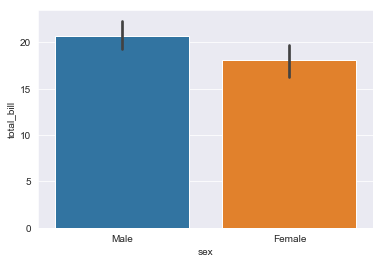

In [8]:
sns.barplot(x='sex', y='total_bill', data=tips)  # set x-axis to a categorical column, numeric col. for y

* Bar plot shows the average or mean of the total_bill for each category of Male/Female.
* We can even change the estimator object, if we want to basically change the actual grouping or aggregation. This can be done by adding another argument estimator.
* Estimator is an aggregate function to estimate within each categorical bin. By default it is average/mean. 
* We can also put in our function, if we have our own aggregate function then we can put in those.
* If we wanted to figure out the standard deviation per gender, like standard deviation, i.e. more variance on their bills is seen among males or females ?

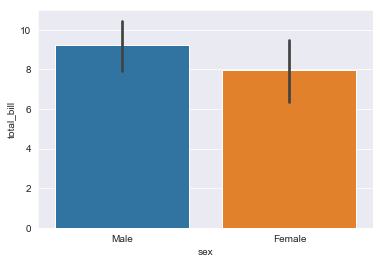

In [11]:
sns.barplot(x='sex', y='total_bill', data=tips, estimator=np.std)
# Tells standard deviation of total_bill column for each gender.

### countplot

This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value:

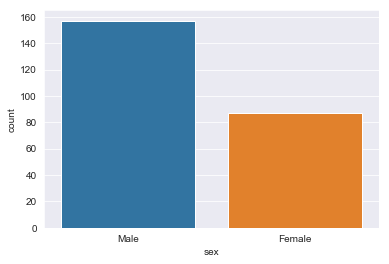

In [13]:
sns.countplot(x='sex',data=tips)
# On passing x, y is automatically chosen as y keeps track of number of occurences of each categorical
# variable of a categorical column.

## boxplot and violinplot

boxplots and violinplots are used to shown the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

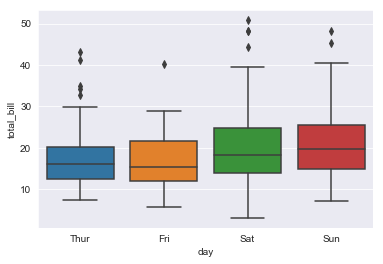

In [14]:
sns.boxplot(x='day',y='total_bill',data=tips)

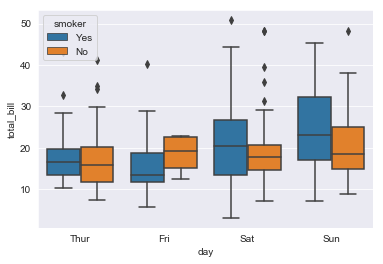

In [16]:
# The plots above have 4 regions, i.e. quarters and the dots are outliers.
sns.boxplot(x='day',y='total_bill',data=tips,hue='smoker')
#  We can do fancy stuff with seaborn by adding hue parameter, allows us to split up the box plots
# by another categorical columns.
# On running the code above would show box plots split per day and also split by smoker status .

* The above plot say For example Fridays can be interpreted as people tend to have more larger bill,
if the person is a non-smoker.

### violinplot
A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

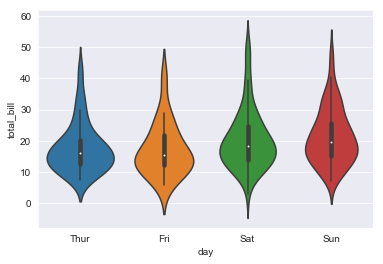

In [18]:
sns.violinplot(x='day',y='total_bill',data=tips)
#  Violinplot would also show distribution of data, across some category, takes same args as boxplot.

* Violinplot unlike box plot allows us to plot all the components which correspond to the data points.
* It essentially shows us the kernel density estimation of the distribution.
* Which basically is distribution of points on its side, which reveals more information about data points.
* The only disadvantage of a violinplot is that it is harder to interpret when compared with boxplot.
* Violin plots can be shown next to each other by passing a categorical column to hue argument.

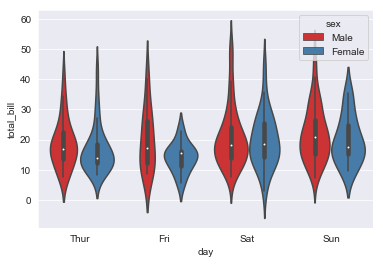

In [19]:
# To show violin plots next to each other.
sns.violinplot(x="day", y="total_bill", data=tips, hue='sex', palette='Set1')

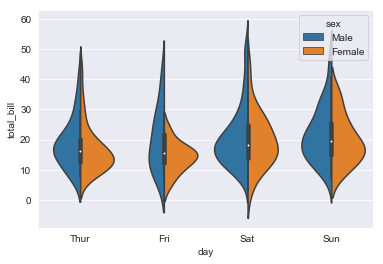

In [21]:
sns.violinplot(x="day", y="total_bill", data=tips, hue='sex', split=True)

* Instead of having 2 violinplots next to each other, we can have one half as one hue and other half as other hue by passing arg. split = True.
* Allows us to directly compare the distributions based on another category and see how categories themselves compare to each other on the x-axis.
* At the end of the day it boils down to your audience, if you are dealing with data science people who have seen violin plots before then violin plots are a good choice, if you are dealing with CEO, executives, management people then a boxplot may be the correct choice. 

## stripplot and swarmplot
The stripplot will draw a scatterplot where one variable is categorical. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

The swarmplot is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them).

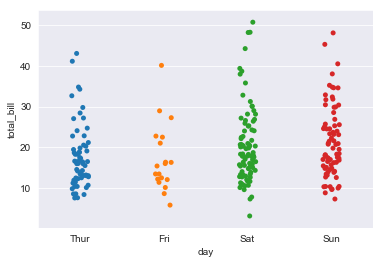

In [23]:
sns.stripplot(x='day',y='total_bill',data=tips) # x = categorical , y = numerical



* Just a scatter plot based on category day. 
* Issue with stripplot() is that we can't tell how many points are overlapping at some places.
* To overcome that problem add the argument jitter=True. Jitter adds some random noise to separate the stack points. Which essentially allows us to see density a little better.

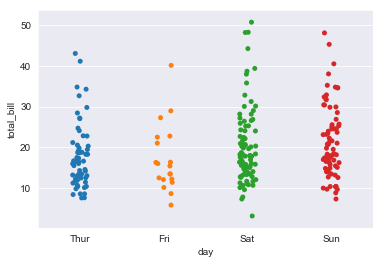

In [25]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True)

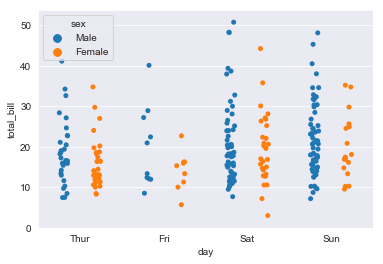

In [27]:
# Here also we can add hue based on another categorical column and split to split Categorical values of hue.
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True,hue='sex',split=True)


* Again, remember this is a bit hard to interprete when compared to a box or violin plot, so know your audience.

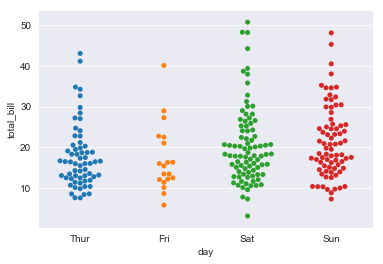

In [31]:
# Combine the idea of stripplot and violinplot and what you will have is a swarmplot.
sns.swarmplot(x='day',y='total_bill',data = tips)

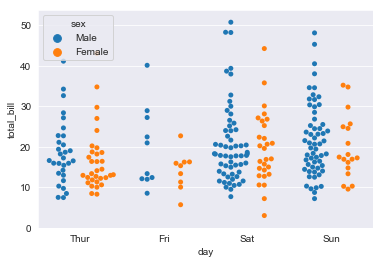

In [33]:
sns.swarmplot(x='day',y='total_bill',data = tips,hue='sex',split = True)

* Swarmplot shows the same distribution but also it shows all the points themselves.
* Drawback of using a swarmplot is that these do not scale nicely to very large numbers, in terms of abilities to show all the points, and takes a lot of computation to arrange in such a manner that these do not overlap. 
* Hence, do not use swarmplots for very large datasets.
* Another thing is, you can combine swarm and violin in one cell. Shows kde and swarmplot together.
* More useful for exploratory data analysis instead of data visualisation.
* Box, count and bar plots for executive meeting. :)
* Violin, strip, swarm plots more suited for data science people.

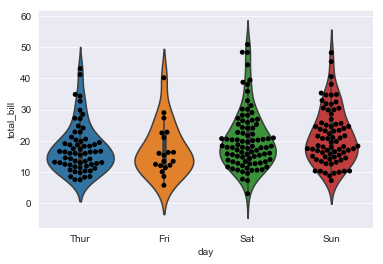

In [34]:
sns.violinplot(x='day',y='total_bill',data = tips)
sns.swarmplot(x='day',y='total_bill',data = tips,color='black')

## factorplot

factorplot is the most general form of a categorical plot. It can take in a **kind** parameter to adjust the plot type:

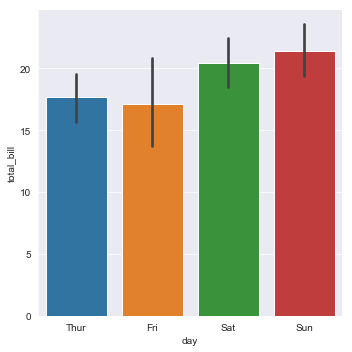

In [35]:
sns.factorplot(x='day',y='total_bill',data = tips,kind='bar')
#  Takes x,y,data but also kind as well
# So, the most general method is to call the factorplot and specify the kind of plot you want.

# Well Done!